In [2]:
import numpy as np
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
def BWS(data0, data1):
    n = len(data0)
    m = len(data1)
    
    S = sorted(data0)
    R = sorted(data1)
    
    Bx = 0
    By = 0
    
    for i in range(n):
        Bx += ((S[i] - (n+m)/n*(i+1))**2)/((i+1)/(n+1)*(1 - (i+1)/(n+1))*m*(n+m)/n)
    for y in range(n):
        By += ((R[i] - (n+m)/n*(i+1))**2)/((i+1)/(m+1)*(1 - (i+1)/(m+1))*n*(n+m)/m)
    Bx *= 1/n
    By *= 1/m
        
    return 1/2*(Bx + By)

In [6]:
compare_stats = list()

for i in range(1000):
    data0 = np.random.normal(0, 1, 1000)
    data1 = np.random.normal(0, 1, 1000)
    compare_stats.append(BWS(data0, data1))

<h1>TASK 1</h1>

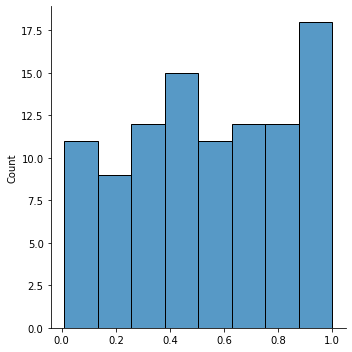

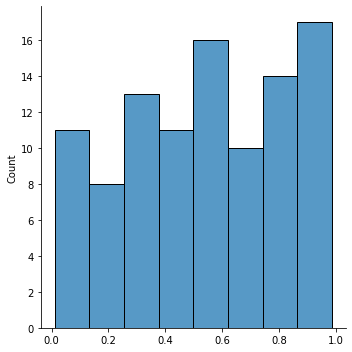

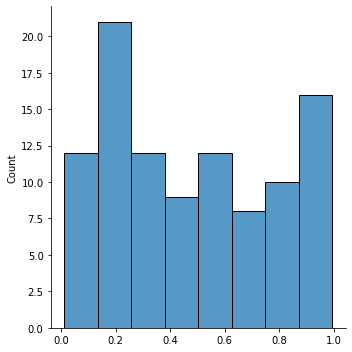

In [8]:
smirnov_pvalue = list()
whitney_pvalue = list()
bws_pvalue = list()

for i in range(100):
    data0 = np.random.normal(0, 1, 1000)
    data1 = np.random.normal(0, 1, 1000)
    
    smirnov = stats.ks_2samp(data0, data1).pvalue
    smirnov_pvalue.append(smirnov)
    
    whitney = stats.mannwhitneyu(data0, data1).pvalue
    whitney_pvalue.append(whitney)
    
    bws = BWS(data0, data1)
    m = (compare_stats < bws).astype('int').sum()
    
    bws_pvalue.append((m+1)/1001)
    
    
for data in [smirnov_pvalue, whitney_pvalue, bws_pvalue]:
    sb.displot(data)

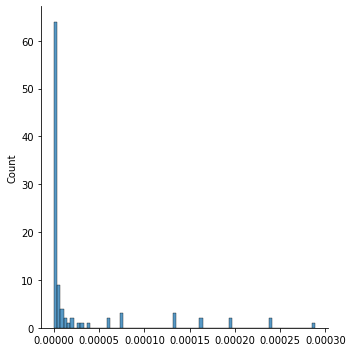

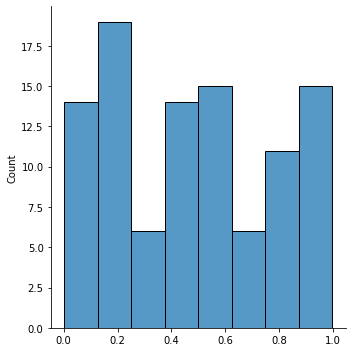

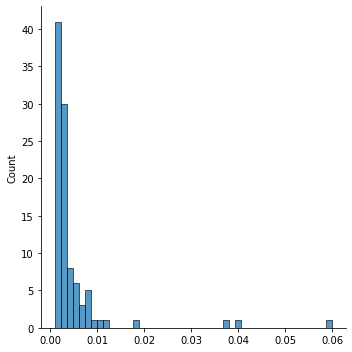

In [7]:
smirnov_pvalue = list()
whitney_pvalue = list()
bws_pvalue = list()

for i in range(100):
    data0 = np.random.normal(0, 1, 1000)
    data1 = np.random.normal(0, 1.5, 1000)
    
    smirnov = stats.ks_2samp(data0, data1).pvalue
    smirnov_pvalue.append(smirnov)
    
    whitney = stats.mannwhitneyu(data0, data1).pvalue
    whitney_pvalue.append(whitney)
    
    bws = BWS(data0, data1)
    m = (compare_stats <= bws).astype('int').sum()
    
    bws_pvalue.append((m+1)/1001)
    
    
for data in [smirnov_pvalue, whitney_pvalue, bws_pvalue]:
    sb.displot(data)

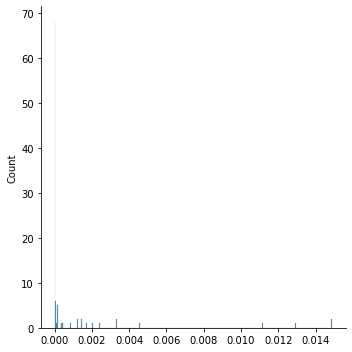

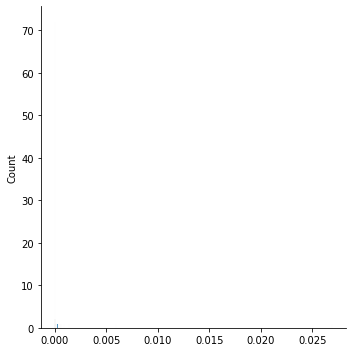

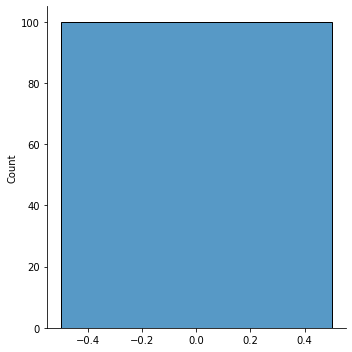

In [9]:
smirnov_pvalue = list()
whitney_pvalue = list()
bws_pvalue = list()

for i in range(100):
    data0 = np.random.exponential(1, 1000)
    data1 = np.random.exponential(1.3, 1000)
    
    smirnov = stats.ks_2samp(data0, data1).pvalue
    smirnov_pvalue.append(smirnov)
    
    whitney = stats.mannwhitneyu(data0, data1).pvalue
    whitney_pvalue.append(whitney)
    
    bws = BWS(data0, data1)
    m = (compare_stats <= bws).astype('int').sum()
    
    bws_pvalue.append((m+1)/1001)
    
    
for data in [smirnov_pvalue, whitney_pvalue, bws_pvalue]:
    sb.displot(data)

<h1>TASK 2<h1>

<h1>a)</h1>

In [77]:
a_list = [5, 5, 5, 5, 5]

data_list = list()

p_anova_list = list()
p_krusk_list = list()

for i in range(100):
    for a in a_list:
        data_list.append(np.random.uniform(a - 1/2, a + 1/2, 100))
    p_anova_list.append(stats.f_oneway(*data_list).pvalue)
    p_krusk_list.append(stats.kruskal(*data_list).pvalue)
p_anova_list = np.array(p_anova_list)
p_krusk_list = np.array(p_krusk_list)
p_anova_list.mean(), p_krusk_list.mean()

(0.8369944650618258, 0.8348289440504111)

<AxesSubplot:ylabel='Density'>

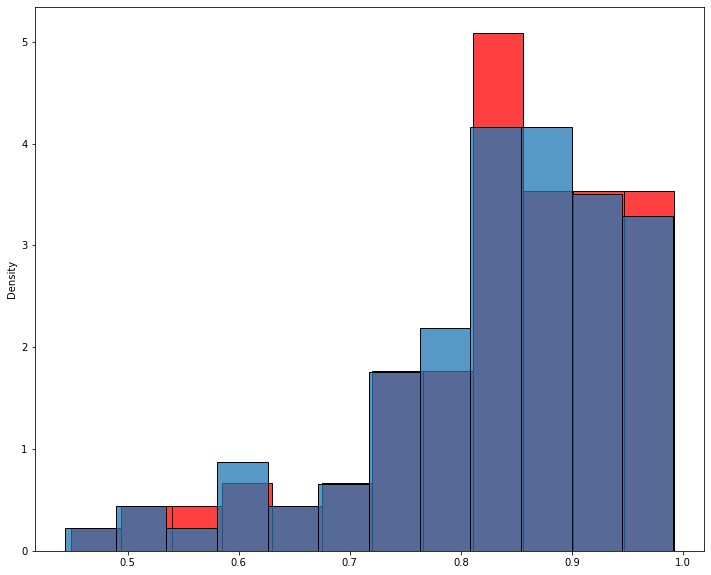

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sb.histplot(p_anova_list, kde=False, stat="density", ax=ax, color='r', bins=12)
sb.histplot(p_krusk_list, kde=False, stat="density", ax=ax, bins=12)

<h1>b)</h1

In [93]:
a_list = [0, 0, 0, 0, 0.5]

data_list = list()

p_anova_list = list()
p_krusk_list = list()

for i in range(100):
    for a in a_list:
        data_list.append(np.random.uniform(a - 1/2, a + 1/2, 100))
    p_anova_list.append(stats.f_oneway(*data_list).pvalue)
    p_krusk_list.append(stats.kruskal(*data_list).pvalue)
p_anova_list = np.array(p_anova_list)
p_krusk_list = np.array(p_krusk_list)
p_anova_list.mean(), p_krusk_list.mean()

(1.4189114318360974e-45, 5.923784504837113e-34)

<h1>c)</h1

In [82]:
data_list = list()

p_anova_list = list()
p_krusk_list = list()

for i in range(100):
    a =(i + 1)/10
    for a in a_list:
        data_list.append(np.random.uniform(a - 1/2, a + 1/2, 100))
    p_anova_list.append(stats.f_oneway(*data_list).pvalue)
    p_krusk_list.append(stats.kruskal(*data_list).pvalue)
p_anova_list = np.array(p_anova_list)
p_krusk_list = np.array(p_krusk_list)
p_anova_list.mean(), p_krusk_list.mean()

(1.910072761520404e-35, 2.6544582803212343e-25)

(<seaborn.axisgrid.FacetGrid at 0x186978bd970>,
 <seaborn.axisgrid.FacetGrid at 0x186977daa60>)

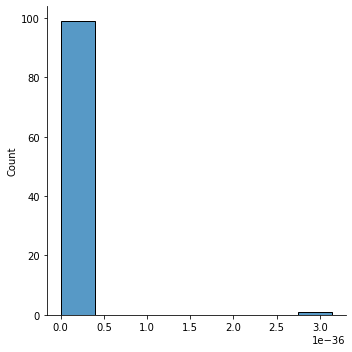

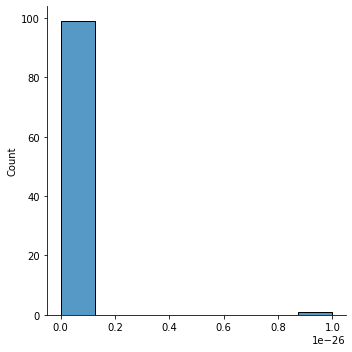

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sb.histplot(p_anova_list, kde=False, stat="density", ax=ax, color='r', bins=12)
sb.histplot(p_krusk_list, kde=False, stat="density", ax=ax, bins=12)